In [1]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

def plot_decision_boundary(clf, axes):
    x1 = np.linspace(axes[0], axes[1], 100)
    x2 = np.linspace(axes[2], axes[3], 100)
    
    x1_mesh, x2_mesh = np.meshgrid(x1, x2)
    x1_x2 = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
    
    grid_prediction = clf.predict(x1_x2).reshape(x1_mesh.shape)
    plt.contourf(x1_mesh, x2_mesh, grid_prediction, alpha=0.3)
    
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    
def get_linearly_separable_iris_data(scale=True):
    iris = datasets.load_iris()
    X = iris['data'][:, (2, 3)]
    y = (iris['target'] == 2).astype(np.float64)
    idx = []
    
    # making sure the data is linearly separable so we can fit a hard-margin svm
    for i, x in enumerate(X):
        if y[i] != 0 or x[0] < 4.2:
            idx.append(i)
    
    X, y = X[idx], y[idx]
    
    if scale:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
            
    return X, y

[2.18464802 2.27591335]


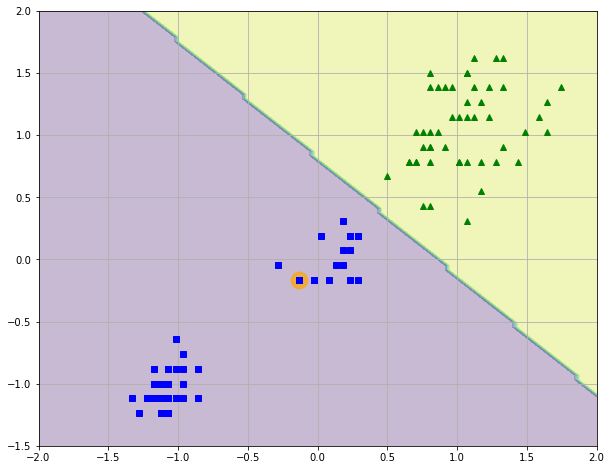

In [12]:
iris = datasets.load_iris()

X, y = get_linearly_separable_iris_data()

axes = [-2, 2, -1.5, 2]

# C big to force hard-margin SVM
linear_clf = LinearSVC(loss='hinge', C=1000000)
linear_clf.fit(X, y)

plt.figure(figsize=(10, 8))
plot_decision_boundary(linear_clf, axes)
plot_dataset(X, y, axes)

b = linear_clf.intercept_[0]
w = linear_clf.coef_[0]

# picks a random point to try
xi, yi = X[51], y[51]

# highlights the chosen point
plt.scatter([xi[0]], [xi[1]], c='orange', alpha=0.7, s=280)

ti = 1 if yi == 0 else -1
gamma = ti * (w.T @ xi + b)
xi_line = xi - gamma * w / np.linalg.norm(w)

plt.scatter(xi_line[0], xi_line[1], c='k') 
print(xi_line) # [2.18464802 2.27591335] far from line